# Relationship between health population and nutrition statistics of a country and its GDP

## Data Exploration and Cleaning

In [4]:
import pandas as pd

# Read CSV file with low_memory=False
nutr_df = pd.read_csv("../data.csv", low_memory=False)

In [6]:
nutr_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
Unnamed: 60       float64
Length: 61, dtype: object

In [30]:
nutr_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(nutr_df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')


### Exploring Null Values

The code below demonstrates that all 89010 rows contain null values. Therefore, it clearly does not make sense to drop rows with null values.

In [32]:
num_nulls = nutr_df.isna().any(axis=1).sum()
num_nulls

89010

In [14]:
nutr_df.shape

(89010, 61)

In [33]:
num_dups = nutr_df.duplicated().sum()
num_dups

0

We will now look into which columns primarily have null values

In [7]:
#get the null counts for each year
null_year_df = pd.DataFrame()
years=[]
null_counts=[]
for year in range(1960, 2016):
  years.append(str(year))
  null_counts.append(nutr_df[str(year)].isna().sum())

null_year_df['year']=years
null_year_df['null_count']=null_counts

/var/folders/3s/6h63ktl15h541pj1y1mgy8vw0000gn/T/ipykernel_99148/40134989.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( years, rotation=45 )


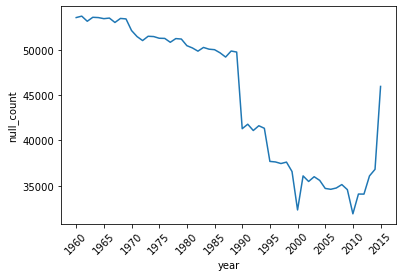

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.lineplot(data=null_year_df, x='year', y='null_count')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%5!=0:
        xticks[i].set_visible(False)
ax.set_xticklabels( years, rotation=45 )        
plt.show()

From the graph above, we can see that the early years (1960-1985) primarily contain null values. This makes sense, as data collection was not as consistent back then.

### Pivoting the table

We will pivot the indicators to the columns and years to the rows. 
We are pivoting indicators to columns to make future steps in training the model more straightforward. Having the indicators in columns will allow us to easily project the table to indicators of interest. We are pivoting the years to the rows to make it easier to remove None and Nan values by year rather than by row. In our EDA, we see that most rows contain at least one None/Nan value in the columns of early years since not much data was collected then.

In [52]:
nutr_df.columns
nutr_df.drop("Unnamed: 60", axis=1, inplace=True)

In [18]:
melt_nutr_df = nutr_df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")


In [20]:
melt_nutr_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Year', 'Value'],
      dtype='object')

In [25]:
unique_indicators = nutr_df['Indicator Name'].unique().tolist()

In [62]:
pivoted_df=pd.DataFrame()
first=True
for i in unique_indicators:
    if first:
        pivoted_df['Country Name']=melt_nutr_df[melt_nutr_df['Indicator Name']==i]['Country Name']
        pivoted_df['Year']=melt_nutr_df[melt_nutr_df['Indicator Name']==i]['Year']
        first=False
    pivoted_df[i]=melt_nutr_df[melt_nutr_df['Indicator Name']==i]['Value']
    

/var/folders/3s/6h63ktl15h541pj1y1mgy8vw0000gn/T/ipykernel_99148/420717011.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  pivoted_df[i]=melt_nutr_df[melt_nutr_df['Indicator Name']==i]['Value']


In [68]:
pivoted_df.head(5)

,Country Name,Year,% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (0-14 years) living with HIV,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15+) living with HIV,Adults (ages 15+) newly infected with HIV,"Age at first marriage, female",...,Urban population,Urban population (% of total),Urban population growth (annual %),Urban poverty headcount ratio at national poverty lines (% of urban population),Use of any antimalarial drug (% of pregnant women),Use of insecticide-treated bed nets (% of under-5 population),"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%)
0,Arab World,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,Caribbean small states,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,Central Europe and the Baltics,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,Early-demographic dividend,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1380,East Asia & Pacific,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlation Matrix
In the following cells, we will determine which indicators have the greatest impact on a country's GDP. This will be done though by finding the correlation between the GDP and each indicator.

## Linear Regression

Define a linear regerssion model using the indicators with high correlation as features and GDP as the label

## Random Forest Regressor

## Clustering

Our last approach will be to use clustering to classify what bracket of GDP a country falls in. While this will not give an accurate GDP like the prediction models above, this fits the purpose of our project, which is to predict the welfare of a nation based on its socioeconomic and cultural metrics. It suffices to group certain ranges of GDPs and predict what group a particular country falls under

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
# Extract the features we want to include in the PCA
X = melt_nutr_df[['Year', 'Value']]

In [18]:
# Standardize the features by subtracting the mean and scaling to unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the standardized data
pca.fit(X_std)

# Transform the data to the new coordinate system
X_pca = pca.transform(X_std)

# Create a new DataFrame with the transformed data and the country labels
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Country'] = melt_nutr_df['Country Name']

# Print the explained variance of each principal component
print(pca.explained_variance_ratio_)

[0.50326287 0.49673713]


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Aggregate the values for duplicate entries
melt_nutr_df_avg = melt_nutr_df.groupby(['Indicator Name', 'Country Name'])['Value'].mean().reset_index()
melt_nutr_df_avg

,Indicator Name,Country Name,Value
0,% of females ages 15-49 having comprehensive c...,Afghanistan,1.500000
1,% of females ages 15-49 having comprehensive c...,Albania,11.333333
2,% of females ages 15-49 having comprehensive c...,Algeria,10.700000
3,% of females ages 15-49 having comprehensive c...,Argentina,45.300000
4,% of females ages 15-49 having comprehensive c...,Armenia,19.033333
...,...,...,...
67995,Women's share of population ages 15+ living wi...,Vietnam,19.073451
67996,Women's share of population ages 15+ living wi...,World,49.354686
67997,Women's share of population ages 15+ living wi...,"Yemen, Rep.",32.095671
67998,Women's share of population ages 15+ living wi...,Zambia,56.782600
